In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.layers.normalization import BatchNormalization

from read_dataset import read_ceps_with_train_test
import numpy as np
from create_data_ceps import createCepsSS
from read_saved_models import loadCepsStanderdScaler

from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
X_train, X_test, y_train, y_test = read_ceps_with_train_test(recreate_data=True)

In [3]:
def getStanderizedData(data):
    data_shape = data.shape
    n = data_shape[0]
    reshaped_data = data.reshape(n, -1)
    saved_ss = loadCepsStanderdScaler()
    trasformed_data = saved_ss.transform(reshaped_data)
    ret_data = trasformed_data.reshape(data_shape)
    return ret_data

In [4]:
X_ss_train = getStanderizedData(X_train)
X_ss_test = getStanderizedData(X_test)

In [5]:
layer_1_outdim = 1000
layer_1_dropout = 0.5
layer_2_outdim = 800
layer_2_dropout = 0.5
layer_3_outdim = 100
layer_3_dropout = 0.3

In [6]:
model = Sequential()

# this layerf from https://keras.io/getting-started/sequntial-model-guide/
# Dense(64) is fully-connected layer with 64 hidden units
model.add(Dense(layer_1_outdim, activation='relu', input_dim=20))
model.add(Dropout(layer_1_dropout))
model.add(BatchNormalization())

model.add(Dense(layer_2_outdim, activation='relu'))
model.add(Dropout(layer_2_dropout))
model.add(BatchNormalization())

model.add(Dense(layer_3_outdim, activation='relu'))
model.add(Dropout(layer_3_dropout))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

# sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
adam = Adam(lr=0.01, decay=1e-9)

model.compile(loss='categorical_crossentropy',
             optimizer=adam,
             metrics=['accuracy'])
epoch = 20

In [7]:
result = model.fit(X_ss_train, y_train, epochs=epoch, batch_size=100,  validation_split=0.2)

Train on 640 samples, validate on 160 samples
Epoch 1/20
640/640 [==============================] - 5s - loss: 2.1763 - acc: 0.3125 - val_loss: 7.3191 - val_acc: 0.2750
Epoch 2/20
640/640 [==============================] - 1s - loss: 1.5618 - acc: 0.4656 - val_loss: 6.4201 - val_acc: 0.2562
Epoch 3/20
640/640 [==============================] - 1s - loss: 1.2728 - acc: 0.5375 - val_loss: 6.5581 - val_acc: 0.2750
Epoch 4/20
640/640 [==============================] - 1s - loss: 1.2559 - acc: 0.5641 - val_loss: 5.0283 - val_acc: 0.3375
Epoch 5/20
640/640 [==============================] - 1s - loss: 1.1871 - acc: 0.5812 - val_loss: 3.6837 - val_acc: 0.3563
Epoch 6/20
640/640 [==============================] - 1s - loss: 1.1197 - acc: 0.5859 - val_loss: 3.4748 - val_acc: 0.3750
Epoch 7/20
640/640 [==============================] - 1s - loss: 1.0435 - acc: 0.6219 - val_loss: 2.5772 - val_acc: 0.4312
Epoch 8/20
640/640 [==============================] - 1s - loss: 1.0053 - acc: 0.6375 - val_l

100/200 [==============>...............] - ETA: 0s
['loss', 'acc']
[1.4013639688491821, 0.53499999642372131]


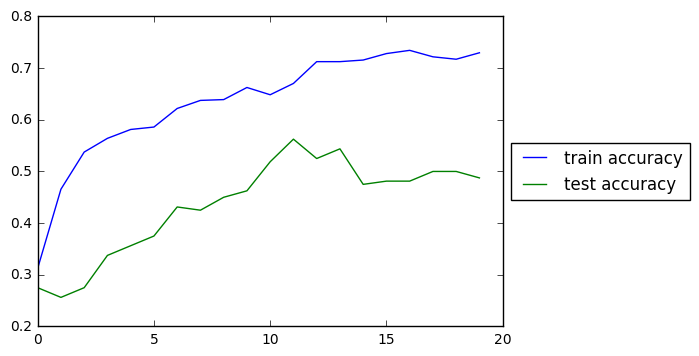

In [8]:
x = range(epoch)
plt.plot(x, result.history['acc'], label='train accuracy')
plt.plot(x, result.history['val_acc'], label='test accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

score = model.evaluate(X_ss_test, y_test, batch_size=100)
print("")
print(model.metrics_names)
print(score)

In [9]:
model_filepath = "./savedModels/ceps_standerized_dense_model.h5"
model.save(model_filepath)

In [10]:
# adjast param results

"""
note

---
layer_1_outdim = 100
layer_1_dropout = 0.5
layer_2_outdim = 100
layer_2_dropout = 0.4
layer_3_outdim = 50
layer_3_dropout = 0.5
loss: 1.3307 - acc: 0.5479 - val_loss: 1.4328 - val_acc: 0.4250
test['loss', 'acc'][1.3474427759647369, 0.51999998837709427]
---

"""

"\nnote\n\n---\nlayer_1_outdim = 100\nlayer_1_dropout = 0.5\nlayer_2_outdim = 100\nlayer_2_dropout = 0.4\nlayer_3_outdim = 50\nlayer_3_dropout = 0.5\nloss: 1.3307 - acc: 0.5479 - val_loss: 1.4328 - val_acc: 0.4250\ntest['loss', 'acc'][1.3474427759647369, 0.51999998837709427]\n---\n\n"

In [11]:
file_path = "../data/songData/genres/disco/disco.00006.ceps.npy"
ceps = np.load(file_path)

t_ceps = ceps.transpose()
t_num_ceps = len(t_ceps)
t_ceps_mean = np.mean(t_ceps[int(t_num_ceps / 10):int(t_num_ceps * 9 / 10)], axis=0)
predict_data = np.array([t_ceps_mean])
predict_data = getStanderizedData(predict_data)

In [12]:
predict_result = model.predict(predict_data)
print(predict_result)
print(np.argmax(predict_result))

[[  1.76468445e-03   3.03516979e-04   6.63060928e-03   7.69682944e-01
    1.71433622e-03   1.76223845e-03   9.09261499e-03   2.68233428e-03
    1.29737100e-03   2.05069467e-01]]
3
